# COM4509/6509 - Lab 1: Probability

The first half of the notebook introduces some tools we will use. It is anticipated that this will take longer than the hour of the lab. Please finish in your own time - feel free to work with your friends on the lab!

## Python and Jupyter

You are currently looking at a jupyter notebook, that uses python. If you've not coded in python before, you should spend a few hours getting used to it. See the [official python tutorial](https://docs.python.org/3/tutorial/index.html). Jupyter notebooks are an interactive way of coding, making notes, plotting graphs etc. They are useful as a tool for doing exploratory data analysis, but in real projects it is usually necessary to eventually build a python module with proper class structures, etc.

## Getting it running on your computer

The easiest way to get going with python, jupyter and various libraries useful for machine learning is to install the [anaconda distribution](https://www.anaconda.com/products/distribution). You could also try using google colabs, although that can be awkward (e.g. saving changes, etc).

## Intro to python, jupyter notebooks, numpy.

We'll be coding in python, using juyter/colab notebooks, like this one.

The content is in different 'cells'. Some are text (like this one) and some are code, like the next one:

In [ ]:
print("I'm a "+"code"+" cell!")

I'm a code cell!


You can edit cells by double clicking on them and run the code cells by click the "Run cell" arrow (on the left hand side if you mouse over the cell). Try clicking on the run cell arrow in the cell above.

**Tip: if you have a code cell selected Ctrl+Enter runs it, and Shift+Enter runs it and moves onto the next cell.**

We use libraries when coding, that contain lots of useful tools and functions. A key one for doing machine learning is **numpy**. We can import it like this:

In [ ]:
import numpy as np

We can then use functions from it like this:

In [ ]:
np.cos(np.pi)

-1.0

## Intro to numpy

We can use it to define vectors, matrices, etc...

- A vector is a list of numbers
- A matrix is a table of numbers

For example, we might have a list of the grades of the class:

In [ ]:
grades = np.array([54,34,57,22,84,93,14,45,75,55,84,51,62,44])

- this is a vector that's 14 long, and is one dimensional. Let's display it: (the last thing in a cell has its output printed).

In [ ]:
grades

array([54, 34, 57, 22, 84, 93, 14, 45, 75, 55, 84, 51, 62, 44])

We can ask for the 'shape' of this variable:

In [ ]:
grades.shape

(14,)

We can find out what the mean of the grades is:

In [ ]:
np.mean(grades)

55.285714285714285

We can get just the first item using:

In [ ]:
grades[1]

34

Notice that the first item has index ZERO (not one).

We can get the last item using -1:

In [ ]:
grades[-1]

44

There's useful syntax called slice notation. For example:
- if we want the first five items, we use `grades[:5]`
- we we want the last three itesm we use `grades[-3:]`
- if we want those at indexes 1,2 and 3: `grades[1:4]` - this is more tricky, have a think about what's going on.
- if we want just the ones at 1,3,5,7,9...etc we can use: `grades[[1,3,5,7,9,11,13]]` or we can also tell it how to step through `grades[1::2]` means it steps through two at a time, starting at index 1.

In [ ]:
grades[[1,3,5,7,9,11,13]]


array([34, 22, 93, 45, 55, 51, 44])

We have another vector that tells us which students are MSc students.

In [ ]:
msc = np.array([True,False,False,False,True,True,False,False,True,False,True,False,True,False])

We can index the grades array using this array:

In [ ]:
print(msc)

[ True False False False  True  True False False  True False  True False
  True False]


In [ ]:
grades[msc]

array([54, 84, 93, 75, 84, 62])

And get the average of these:

In [ ]:
np.mean(grades[msc])

75.33333333333333

We could put them into a separate variable,

In [ ]:
mscgrades = grades[msc]

What's the average of the other students?

In [ ]:
np.mean(grades[~msc]) # ~ means 'not'

40.25

What proportion of those on the BSc programme are over 40%?
We can do a boolean comparison to each element in the vector. This will make a new vector with Trues and Falses in:

In [ ]:
grades[~msc]>40

array([False,  True, False, False,  True,  True,  True,  True])

We are able to ask for the mean of this as it treats 'True' as '1' and 'False' as '0', so the mean will give the proportion that are above 40:

In [ ]:
np.mean(grades[~msc]>40)

0.625

In [ ]:
attendance = np.array([0.5,0.6,0.4,0.4,0.9,0.9,0.2,0.3,0.8,0.5,0.9,0.5,0.6,0.4])

### Matrices?

(note: in numpy nowadays we just use `array` for everything, including vectors, matrices and higher-order tensors).

We might have a table that has *both* the grade and if their on the MSc programme, rather than two separate vectors.

We can build a matrix from our vectors, using this syntax:

In [ ]:
students = np.c_[grades,msc,attendance] #this means we want to join columns together

students #written here to make it print, note that it's converted the boolean Trues/Falses into 1s and 0s - as all the types must be the same in an array.

array([[54. ,  1. ,  0.5],
       [34. ,  0. ,  0.6],
       [57. ,  0. ,  0.4],
       [22. ,  0. ,  0.4],
       [84. ,  1. ,  0.9],
       [93. ,  1. ,  0.9],
       [14. ,  0. ,  0.2],
       [45. ,  0. ,  0.3],
       [75. ,  1. ,  0.8],
       [55. ,  0. ,  0.5],
       [84. ,  1. ,  0.9],
       [51. ,  0. ,  0.5],
       [62. ,  1. ,  0.6],
       [44. ,  0. ,  0.4]])

What shape is students?

In [ ]:
students.shape

(14, 3)

This is in the order mathematicians are used to: Number of rows, Number of columns: So there are 14 rows and 3 columns.

We can ask for the grade of student at index=4 down:

In [ ]:
students[4,0] #this asks for row number 4, column number 0

84.0

If we want the attendance of students between rows 4 and 8,

In [ ]:
students[4:9,2] #as it's 4-8 inclusive, we need to ask for 4:9. The '2' tells it that we want column number 2.

array([0.9, 0.9, 0.2, 0.3, 0.8])

We've been told that, as the undergrad students have worked so hard this semester they are all going to get an extra 3 marks added. How can we do that?

We can pick out the rows that are undergrads like this.

1) The students that are undergrads are found at:

In [ ]:
students[:,1]==0

array([False,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True, False,  True])

2) So we can pick the grades out:

In [ ]:
students[students[:,1]==0,0] = students[students[:,1]==0,0] + 3 #this will change the students table !!! If you run this cell repeatedly you'll add 3 repeatedly!!

In [ ]:
students

array([[54. ,  1. ,  0.5],
       [37. ,  0. ,  0.6],
       [60. ,  0. ,  0.4],
       [25. ,  0. ,  0.4],
       [84. ,  1. ,  0.9],
       [93. ,  1. ,  0.9],
       [17. ,  0. ,  0.2],
       [48. ,  0. ,  0.3],
       [75. ,  1. ,  0.8],
       [58. ,  0. ,  0.5],
       [84. ,  1. ,  0.9],
       [54. ,  0. ,  0.5],
       [62. ,  1. ,  0.6],
       [47. ,  0. ,  0.4]])

Time to revisit some of the lecture info...

- what is the probability of a student having a grade over 60? The estimator is simply the proportion of students that do:

In [ ]:
np.mean(students[:,0]>60)

0.35714285714285715

- What is the probability of a student attending more that 0.65 of the lectures?

In [ ]:
np.mean(students[:,2]>0.65)

0.2857142857142857

What's the probability of a student getting a grade over 60 AND attending more than 0.65 of the lectures?

In [ ]:
np.mean((students[:,0]>60) & (students[:,2]>0.65)) #corrected (was 0.55 before)

0.2857142857142857

Oh, let's stop and just look at what we did there...

The first part `(students[:,0]>60)` generates a boolean vector of those with a mark over 40:

In [ ]:
students[:,0]>60

array([False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True, False])

The second part `students[:,2]>0.65` does the same for those who attended lots:

In [ ]:
students[:,2]>0.65

array([False, False, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False])

We can use the `&` operator to make a new boolean vector from these two, with True when both of the others are true.

**Tip: The brackets are often necessary to ensure that we get the correct order of precedence.**

In [ ]:
(students[:,0]>60) & (students[:,2]>0.65)

array([False, False, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False])

So, does it seem likely that these are independent? Let's check:

In [ ]:
np.mean(students[:,0]>60) * np.mean(students[:,2]>0.65) #corrected: was 0.55 before

0.10204081632653061

0.10 is much smaller than 0.36, so it seems like they are not independent.

This doesn't mean that it is causal! It might just be that good students do the worksheets, read the text book and go to lectures.

If we knew if they had done the worksheet, it might be that the grade and lecture attendance are independent GIVEN whether they had done the worksheet.

# Lab 1: Probability

## Introduction to the Dataset

For this exercise we'll use the [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset): 253,680 Americans were called to ask about some of their health-related behaviours (eating fruit etc), and some health outcomes (have they diabetes, etc).

We'll be accessing it using [pandas](https://pandas.pydata.org/docs/user_guide/index.html), a useful library for managing tables of data.

We first need to import various modules we'll use, download the dataset and open it.

In [4]:
import pandas as pd   #useful for data access and manipulation
import urllib.request #used to download the dataset
import matplotlib.pyplot as plt #useful for plotting
#ensure our plots appear in the notebook:
%matplotlib inline
import numpy as np    #numpy is useful for matrix/array/tensor manipulation

Now download and open the dataset:

In [5]:
urllib.request.urlretrieve('https://drive.google.com/u/0/uc?id=1dprY31miDsQSZZwMkOfHoqkH4TQ8gV2W&export=download', './diabetes.csv')
df = pd.read_csv('diabetes.csv')

We can look at the content: It is a large table, containing 253680 rows (each row is a person) and 22 columns:

In [5]:
print("The columns in the dataset:")
print(df.columns)

The columns in the dataset:
Index(['Unnamed: 0', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


The dataframe itself:

In [ ]:
df

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,62.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,52.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,62.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,72.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,72.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,42.0,6.0,7.0
253676,253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,72.0,2.0,4.0
253677,253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,5.0,2.0
253678,253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,52.0,5.0,1.0


To get summary statistics about all these, use the .describe() method of the dataframe:

In [6]:
df.describe()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,57.138127,5.050434,6.053875
std,73231.252481,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,15.323466,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,47.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,57.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,67.000000,6.000000,8.000000
max,253679.000000,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,82.000000,6.000000,8.000000


## Probabilities

We can estimate probabilities from this sample of the population.

Probabilities can be defined as the limit between the ratio of the number of positive outcomes (e.g. heads, if flipping a coin) and the number of trials:

$$P(Y = y) = \lim_{N \rightarrow \infty} \frac{n_y}{N}$$

If you only have a finite number of samples, we can assume that the ratio is still approximately correct for now:

$$P(Y = y) \approx \frac{n_y}{N}$$

### Using the dataset to find some probabilities

What is the probability a person in this dataset is under 50?

As with numpy arrays, we can do a boolean operation on all of them to get a boolean array of which items the condition is true for:

In [2]:
df['Age']<50

NameError: ignored

If we ask for the mean, it will give us the proportion that are true:

In [ ]:
P_lt50 = np.mean(df['Age']<50) #we can use the mean as the comparison returns a boolean with False being treated as a zero, and a True as a one.
print("%0.1f%% of people in the dataset are <50 years old" % (100*P_lt50))

29.3% of people in the dataset are <50 years old


What is the probability a person in the dataset is under 50 AND regularly eats vegatables? (JOINT PROBABILITY)

In [ ]:
P_lt50andVeg = np.mean((df['Age']<50) & (df['Veggies']))
print("%0.1f%% of people in the dataset are <50 years old AND eat vegetables." % (100*P_lt50andVeg))

23.9% of people in the dataset are <50 years old AND eat vegetables.


### Product Rule

What is the probability that they eat vegetables GIVEN they are under 50.

The product rule for probability we learnt was:

$$P(A,B) = P(A|B) P(B)$$

If we rearrange it we can find the conditional probability (please make sure you understand this step):

$$\frac{P(Veg=true, Age<50)}{P(Age<50)} = P(Veg=true\;|\;Age<50)$$

This is a conditional probability. Let's work it out:

In [ ]:
#P(Veg|lt50) = P(Veg, lt50) / P(lt50)
print("Probability of eating vegetables GIVEN they are under 50: %0.1f%%" % (100*P_lt50andVeg/P_lt50))

Probability of eating vegetables GIVEN they are under 50: 81.8%


We can check this a different way, by picking out those who are under 50, and the looking at the proportion of those who eat vegetables:

In [ ]:
dflt50 = df[df['Age']<50] #makes a new dataframe with just those under 50.

#of this dataframe, the proportion who eat veg:
print("Probability of eating vegetables GIVEN they are under 50: %0.1f%%" % (100*np.mean(dflt50['Veggies'])))

Probability of eating vegetables GIVEN they are under 50: 81.8%


### Exercise 1: Fruit, Vegetables and Indepence

We can get if someone eats fruit regularly using `df['Fruits']==1` and if they eat veg regularly using `df['Veggies']==1`. Compute:

- a. the probability of eating fruit regularly.
- b. the probability of eating vegetables regularly.
- c. the probability of eating both fruit AND vegetables regularly.
- d. does it seem like they are independent or not?

Answer here.

In [7]:
p_fruits = np.mean(df['Fruits']==1)
print("The probability of eating fruit regularly is %0.1f%%" % (100*p_fruits))

The probability of eating fruit regularly is 63.4%


In [8]:
p_veg = np.mean(df['Veggies']==1)
print("The probability of eating vegetables regularly is %0.1f%%" % (100*p_veg))

The probability of eating vegetables regularly is 81.1%


In [9]:
p_fruits_veg = np.mean((df['Fruits']== 1) & (df['Veggies']))
print("The probability of eating both fruit AND vegetables regularly is %0.1f%%" % (100*p_fruits_veg))

The probability of eating both fruit AND vegetables regularly is 56.3%


In [10]:
p = p_fruits * p_veg
print(p)
print(p_fruits_veg)

0.5146477409454929
0.5625670135603911


### Exercise 2: Diabetes

We can find the proportion of the participants that have diabetes:

In [10]:
Pdia = np.mean(df['Diabetes_012']==2)
print("Probability of diabetes (in this cohort): %0.1f%%" % (100*np.mean(Pdia)))

Probability of diabetes (in this cohort): 13.9%


- a. What proportion of those who eat fruit AND vegetables have diabetes?

In [16]:
df_f_v = df[(df['Fruits']==1) & (df['Veggies'])]
p_f_v_dia = np.mean(df_f_v['Diabetes_012'] == 2)
print("Proportion of those eating fruits and vegetables having diabetes: %0.1f%%" % (100*p_f_v_dia))

Proportion of those eating fruits and vegetables having diabetes: 12.2%


- b. Can we say that eating fruit and vegetables can reduce the risk of diabetes?

In [ ]:
#Answer here.

### Exercise 3: Plotting

One of the columns is the BMI (body mass index) of the participants. Let's plot it in a histogram.

Text(0, 0.5, 'Frequency')

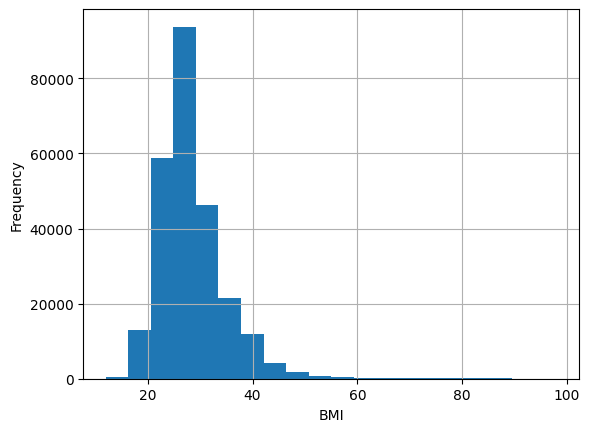

In [ ]:
#it can be useful, for data that has both high counts and low, to switch to a log axis.
#we can do this with the hist method by adding the log=True parameter (Try turning it on / off)
plt.hist(df['BMI'],20)#,log=True);
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Frequency')

Exercise:
    
- a. The second parameter in the call to the `plt.hist` function selects the number of bins. Change it to 30 to get more detail.
- b. Is this a normal distribution? Why/why not?

Text(0, 0.5, 'Frequency')

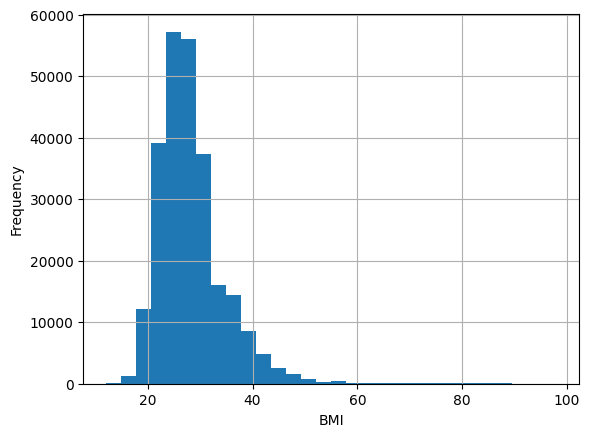

In [17]:
plt.hist(df['BMI'],30)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Frequency')

Let's look at how BMI and income interact. The 'Income' column is *categorical* (with category 1 meaning less than \\$10k/year; and category 8 means \\$75k/year or more). Full details are in the ['codebook' for the dataset](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf).

So we create two numpy arrays `BMIofLowIncome` and `BMIofHighIncome` containing the BMI values for those two groups. We can then plot them as histograms too. I've plotted the density (as the two groups are different sizes, this makes it easier to compare). A density means the area under both histograms each sum to one.

Text(0.5, 0, 'BMI')

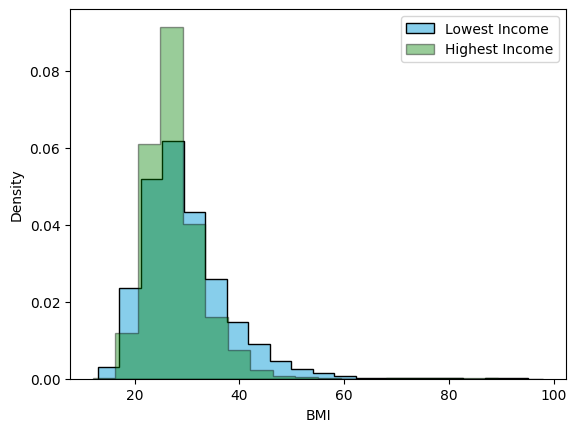

In [ ]:
BMIofLowIncome = df[df['Income']==1]['BMI'].to_numpy()
BMIofHighIncome = df[df['Income']==8]['BMI'].to_numpy()
plt.hist(BMIofLowIncome,20,density=True,histtype='stepfilled',color='skyblue',ec="black",label="Lowest Income")
plt.hist(BMIofHighIncome,20,alpha=0.4,density=True,histtype='stepfilled',color='green',ec="black",label="Highest Income");
plt.legend()
plt.ylabel('Density')
plt.xlabel('BMI')

It seems that the BMI is maybe slightly higher and has greater variance for the lowest income group.

### Exercise 4: Expectations and Moments

We can compute the variance, using `np.var` of the two groups BMIs:

In [ ]:
np.var(BMIofLowIncome)

66.6496538943384

In [ ]:
np.var(BMIofHighIncome)

34.86457316522133

- a. Can you compute the variance without using the `np.var` or `np.mean` functions? Instead think about how we computed the appropriate expectations. You might find `np.sum(x)` useful (this sums over a list or array) and `len(x)` which will give you the length of an array or list, x.

In [ ]:
#Answer here.

- b. The next moment, after the mean and variance is the skewness of a distribution. It is computed by $$\tilde{\mu}_3 = E\Big[\Big(\frac{X-\mu}{\sigma}\Big)^3 \Big]$$
can you compute this?

In [ ]:
#Answer here.

# Naive Bayes

The health centre wants to do a blood test on those most at risk of developing diabetes. e.g. if the probability of having diabetes is more than 20\%.

A new patient arrives, who has a BMI of 40. What's the chance that they have diabetes?

$$P(Diabetes = true \; |\; BMI = 40)$$

The dataframe has a 'Diabetes_012' column (0=no diabetes, 1=pre-diabetic, 2=diabetic). So the proportion of the dataset who are diabetic is:

In [ ]:
np.mean(df['Diabetes_012']==2)

0.13933301797540207

Note that the dataset is **not a representative sample**, so really we wouldn't necessarily want to use it for doing this sort of inference, but we'll continue, as an illustration!

For our patient we can just look at the proportion of those with BMI=40 who have diabetes:

In [ ]:
#Here I create a temporary dataframe with those of a BMI of 40 using `df['BMI']==40]`.
#I then test each value of the Diabetes_012 column, and find the average number that have
#this equal to 2. This givens me the proportion.

dfB40 = df[df['BMI']==40] #make a new dataframe with just those with a BMI of 40.
np.mean(dfB40['Diabetes_012']==2) #find the proportion of this subset with diabetes

0.32063773250664307

So they fall into our 'high risk' category, as 32% of those with a BMI in the dataset have diabetes.

In [ ]:
#note that, due to the categorical nature of the age the ages are just at these
#discrete points:
np.unique(df['Age'])

array([21., 27., 32., 37., 42., 47., 52., 57., 62., 67., 72., 77., 82.])

## The curse of dimensionality

Supposing we also know they are in the age 21 category, and smoke...

We can again make a dataframe containing just those who:
- have a BMI = 40
- are in the age = 21 category
- and smoke,

In [ ]:
#Here I create a temporary dataframe containing those who have a BMI of 40, are in the
#Age=21 category AND smoke, using `df[(df['BMI']==40) & (df['Age']==21) & (df['Smoker']==1)]`
dfM40A21S = df[(df['BMI']==40) & (df['Age']==21) & (df['Smoker']==1)]
np.mean(dfM40A21S['Diabetes_012']==2)

0.0

Great, 0% chance!!
But there's something a bit wrong about this analyis...

In [ ]:
len(dfM40A21S)

6

There are only 6 people in the dataset with a BMI of 40, who are in the 21 years old category, who smoke.

We can display this whole set:

In [ ]:
dfM40A21S

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
58186,58186,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,11.0,0.0,0.0,1.0,21.0,4.0,8.0
109921,109921,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,21.0,5.0,8.0
126529,126529,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,20.0,0.0,0.0,1.0,21.0,5.0,7.0
240700,240700,0.0,1.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,30.0,0.0,0.0,0.0,21.0,4.0,2.0
241084,241084,0.0,1.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,21.0,4.0,3.0
252523,252523,0.0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,20.0,0.0,0.0,21.0,5.0,2.0


### What are we assuming here?

When we assumed that we can approximate the probability with the ratio of cases to the total number in that condition, we were assuming that the total number was very large, so we were approximating infinite numbers of samples,

$$P(Y = y | Z) \approx \frac{n_{y|z}}{N_Z}$$

Six is not a large enough sample.

### Naive Bayes

The Naive Bayes classifier is an approach for making this type of inference by assuming **conditional independence between the features** (given the class). We've already seen (with the fruit and veg above) that this assumption probably is invalid, but it can still give reasonable results.

Let's think about this more carefully:

We are interested in computing the probability of having diabetes (given some features about the person), i.e.:

$P(D=true | x_1, x_2,...,x_n)$.

Quoting from the [wikipedia article](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

> The problem with the above formulation is that if the number of features n is large or if a feature can take on a large number of values, then basing such a model on probability tables is infeasible.

We've seen this problem with the patient above. Only six rows in the database have the same features.

### Rewriting with Bayes Rule

We can write the above conditional distribution as:

$$P(D | x_1, x_2,...,x_n) = \frac{P(x_1, x_2,...,x_n | D) P(D)}{P(x_1, x_2,...,x_n)}$$

We can use the product rule (which leads to the chain rule, when applied lots of times), to see that we can write the likelihood term as:

$$P(x_1, x_2,...,x_n | D) = P(x_1 | x_2,...,x_n, D) \; P(x_2 | x_3,...,x_n, D) \;...\; P(x_{n-1} \;|\; x_n, D)$$

It's not obvious to see why, so let's go through this step-by-step. We start with our likelihood term telling us the probability of having a BMI of 40, an age of 21 and smoking, given Diabetes = true (or false):

$$P(B=40, A=21, S = true | D)$$

We can write this using the product rule, as:

$$P(B=40 | A=21, S = true, D) \;\; P(A = 21, S = true | D)$$

We can then apply the same reasoning to the second term (try this yourself).

> It's probably worth stopping, writing this down on a bit of paper and thinking about it! This is quite a difficult step, and once you've understood it the rest will be fairly easy.
>
>  We are using:
> $$P(A,B) = P(A|B)\; P(B)$$
> but there's an additional conditional, 'given C' on everything:
> $$P(A,B|C) = P(A|B,C)\; P(B|C)$$

The result is that we can write our likelihood as a product of conditional probabilities:

$$P(B=40, A=21, S = true | D) \; \\= \\ P(B=40 | A=21, S = true, D) \;\;\times\;\; P(A=21 | S = true, D) \;\;\times\;\; P(S=true | D)$$


### The Naive-bit of Naive Bayes

> **Reminder: Condition independence.** If two random variables ($X,Y$) are conditionally independent, given a third ($Z$) it means that $P(X|Y,Z) = P(X|Z)$. I.e. (for a given value of Z) the probability of $X$ isn't influenced by the value of $Y$. It is written as $X \perp \!\!\! \perp Y | Z$.

Naive bayes: We now make the (conditional) independence assumption in our expression above, that **all the features are conditionally independent (given the diabetes status, D)**.

So we can write that:

$$P(B=40 \; | \; A=21, \; S = true, \; D) \; =\; P(B=40\; |\; D)$$

and,

$$P(A=21 | S = true, D) = P(A=21 | D)$$

Substituting in:

$$P(B=40, A=21, S = true | D) \; =\; P(B=40 | D) \; P(A=21 | D) \; P(S=true | D)$$

Please note that this, in general, isn't true. We are saying it's true because we have assumed conditional independence, e.g. that $B \perp \!\!\! \perp A | D$, etc.

### Why is this useful?

The number of people in the dataset who had a BMI=40, were age=21, and smoked was only 6. But lots of individuals had *each* of these characteristics, so we can use these separately:

Note that Naive Bayes is often used to compute a ratio between two conditions, but here we'll compute the posterior.

$$P(D = true | x_1, x_2,...,x_n) = \frac{P(x_1, x_2,...,x_n | D = true) P(D = true)}{P(x_1, x_2,...,x_n)}$$

To compute the demoninator we marginalise, i.e. we need to compute the numerator for $D = true$ and $D = false$ and add them up:

So notice numerator is the joint probability:

$$P(x_1, x_2,...,x_n, D = true) = P(x_1, x_2,...,x_n | D = true) P(D = true)$$

and

$$P(x_1, x_2,...,x_n, D = false) = P(x_1, x_2,...,x_n | D = false) P(D = false)$$

So we find these and add them up:

$$P(x_1, x_2,...,x_n) = P(x_1, x_2,...,x_n, D = true) + P(x_1, x_2,...,x_n, D = false)$$

### Putting it together...

Applying the Naive Bayes (conditional independence assumption) and substituting in our features (to keep it readable I've hidden the values the RVs are equal to). So we assume:

$P(B, A, S | D)\;\;\; =\; P(B | D)\;\;\; P(A | D) \;\;\; P(S | D)\\
P(B, A, S | \neg D)\; =\; P(B | \neg D)\; P(A | \neg D) \; P(S | \neg D)$

We can then use these to compute the denominator. Here we're using the above approximations to the likelihoods:

$$P(B,A,S) = P(B, A, S | D) P(D) + P(B, A, S| \neg D)P(\neg D)$$

and finally the posterior we're interested in: (remember that we are now going to be using our approximations, based on our assumptions about independence for these terms)

$$P(D | B, A, S) = \frac{P(B | D)\; P(A | D) \; P(S | D)\;P(D)}{P(B, A, S)}$$


In [ ]:
dfD = df[df['Diabetes_012']==2]
dfnotD = df[df['Diabetes_012']==0]

PB40_givenDtrue = np.mean(dfD['BMI']==40)
PB40_givenDfalse = np.mean(dfnotD['BMI']==40)

PA21_givenDtrue = np.mean(dfD['Age']==21)
PA21_givenDfalse = np.mean(dfnotD['Age']==21)

PS_givenDtrue = np.mean(dfD['Smoker']==1)
PS_givenDfalse = np.mean(dfnotD['Smoker']==1)

PDtrue = np.mean(df['Diabetes_012']==2)  #correction
PDfalse = np.mean(df['Diabetes_012']==0) #correction

In [ ]:
PallDtrue = (PB40_givenDtrue * PA21_givenDtrue * PS_givenDtrue * PDtrue)
PallDfalse = (PB40_givenDfalse * PA21_givenDfalse * PS_givenDfalse * PDfalse)

print("Probaility of diabetes, given BMI=40, Age=21 and Smoker = %0.1f %%" % (100*(PallDtrue) / (PallDtrue + PallDfalse)))

Probaility of diabetes, given BMI=40, Age=21 and Smoker = 4.8 %


### Exercise:

- a. What's the probability they have diabetes if they are 62, not a smoker and have a BMI of 20?
- b. What's the probability they are over 50 if they have a BMI of 20 and have diabetes and don't smoke? Use both Naive Bayes and compare to the answer computed with the full conditional distribution (without the independence assumption).

In [ ]:
#Answers here.

### Related topics

- If you play with Naive Bayes you might find situations where no rows in the training set have that feature value. A simple approach to handling that is simply to 'add one' to all the frequencies. This is [Laplace Smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) (and is the equivalent to adding a prior).
- Naive Bayes can be considered as a (simple) Bayesian belief network:<br/>
<img width=300 src="https://www.researchgate.net/publication/283161090/figure/fig1/AS:648613512364033@1531652920537/A-typical-Naive-Bayes-network-diagram.png" /><br/>
<small>A Naive Bayes Network, from <i>Ibrahim et al. (2015). doi: 10.1016/j.procs.2015.09.194.</i></small><br/>
A more complex network can be constructed, with some conditional dependencies added between features using edges. [Wikipedia article on Bayesian networks](https://en.wikipedia.org/wiki/Bayesian_network).

### Summary

With a handful of basic tools (the product rule, marginalisation, etc) we are able to perform really useful inference about important questions.